In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import copy
import time
import math
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction
from math import factorial
import csv

In [4]:
INF = 100000000

In [23]:
def new_matrix(n, mini, maxi):
    return np.random.randint(mini, maxi + 1, (n, n))

def clear(matrix: list):
    m = copy.deepcopy(matrix)
    for i in range(len(m)):
        m[i][i] = INF

    return m

In [6]:
def A(x: list):
    n = len(x)
    ind1 = random.randint(1, n - 1)
    ind2 = random.randint(1, n - 1)
    while (ind2 == ind1):
        ind2 = random.randint(1, n - 1)
    
    ans = x.copy()

    ans[ind1], ans[ind2] = ans[ind2], ans[ind1]
    return ans

In [7]:
def get_coast(g: list, path: list):
    ans = 0
    for i in range(1, len(path)):
        ans += g[path[i - 1]][path[i]]

    return ans

In [8]:
def simulated_annealing(n: int, g: list, p: float, t0: float, temp: callable, vis = True):

    x = list(range(n)) + [0]

    old_coast = get_coast(g, x) 
    evolution_of_coasts = []
    best_paths = []
    for i in range(1, 1000000):
        t = t0 * temp(i)
        x_new = A(x)

        new_coast = get_coast(g, x_new)
        evolution_of_coasts.append(new_coast)
        best_paths.append(x_new)

        if (new_coast - old_coast < 0 or math.exp(-(new_coast - old_coast) / t) <= p):
            x = x_new.copy()
    if (vis):
        plt.plot(evolution_of_coasts[:50])
        plt.title('Зависимость длины маршрута от номера итерации на алгоритме отжига')
        plt.xlabel('номер итерации')
        plt.ylabel('длина маршрута')
    coasts = [get_coast(g, p) for p in best_paths]
    return [best_paths[argmin(coasts)], min(coasts)]

In [13]:
def AS(n: int, g: list, alpha = 1, beta = 2, p = 0.1, Q = 100, ant_count = 15, iter = 2000, vis = True):

    ph = np.full((n, n ), Q / (iter * n))

    inverted_g = np.zeros(n ** 2).reshape(n, n)
    ant_route = np.zeros((ant_count, n))
    ant_dist = np.zeros(ant_count)
    best_dist = np.zeros(iter)
    
    len_best_dist = INF
    route = np.zeros(n)
    perm = random.permutation(n)
    p = np.zeros(n)
    
    for i in range(n):
        for j in range(n):
            if (i != j):
                inverted_g[i][j] = 1 / g[i][j]
            
    paths = []
    best_paths = []
    evolution_of_coasts = []
    for cur_iter in range(iter):
        paths = []
        for k in range(ant_count): #идем по муравью
            cur_path = [random.randint(n)]

            for i in range(n): #сейчас добавляем iый город в маршрут
                unvisited = []
                for city in range(n):
                    if city not in cur_path:
                        unvisited.append(city)

                if (len(unvisited) == 1):
                    cur_path.append(unvisited[0])
                else:
                    prob= []
                    last_city = cur_path[-1]
                    for city in unvisited:
                        prob.append(ph[last_city][city] ** alpha * inverted_g[last_city][city] ** beta)
                    s = sum(prob)
                    for i in range(len(prob)):
                        prob[i] /= s
                    for i in range(1, len(prob)):
                        prob[i] += prob[i - 1]
                    cur_city = random.random()
                    for i in range(len(prob)):
                        if (cur_city <= prob[i]):
                            cur_path.append(unvisited[i])
                            break
            
            cur_path.append(cur_path[0])

            paths.append(cur_path)
            ans_coasts = [get_coast(g, p) for p in paths]
            best_paths.append(paths[argmin(ans_coasts)])
            evolution_of_coasts.append(min(ans_coasts))
        ph = (1 - p) * ph    
        for i in range(ant_count):
            for j in range(n - 1):
            
                ph[paths[i][j]][paths[i][j + 1]] += 1/g[paths[i][j]][paths[i][j + 1]]
    ans_coasts = [get_coast(g, p) for p in best_paths]

    if (vis):
        plt.plot(evolution_of_coasts[:100])
        plt.title('Зависимость длины маршрута от номера итерации на алгоритме муравьиной колонии')
        plt.xlabel('номер итерации')
        plt.ylabel('длина маршрута')
    return [best_paths[argmin(ans_coasts)], min(ans_coasts)]



# Тесты

In [14]:
test1 = [
         [INF, 10, 8, 33, 34],
         [19, INF, 31, 51, 23],
         [89, 86, INF, 454, 232],
         [123, 44, 814, INF, 64],
         [687, 545, 112, 626, INF]
]

Удачный путь для алгоритма отжига 0-3-1-4-2-0, его стоимость 301


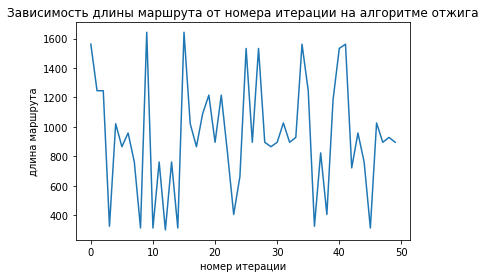

In [15]:
ans = simulated_annealing(5, test1, 0.8, 10, lambda x: 1 / x)
print(f'Удачный путь для алгоритма отжига {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

Удачный путь для муравьиного алгоритма 3-1-4-2-0-3, его стоимость 301


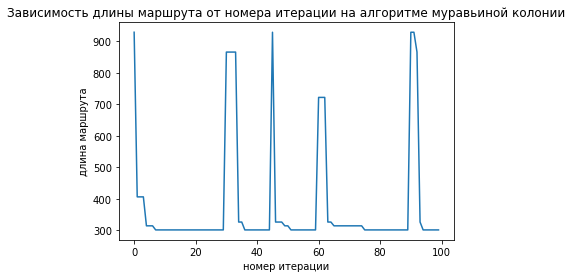

In [16]:
ans = AS(5, test1) #запуск с дефолтными параметрами
print(f'Удачный путь для муравьиного алгоритма {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

Удачный путь для алгоритма отжига 0-1-4-3-2-0, его стоимость 464


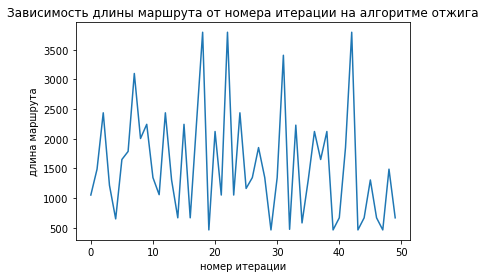

In [17]:
test2 = [
         [INF, 26, 210, 214, 66],
         [69, INF, 145, 121, 84],
         [140, 125, INF, 610, 112],
         [1324, 911, 170, INF, 84],
         [623, 85, 1752, 44, INF]
]
t0 = time.time()
ans = simulated_annealing(len(test2), test2, 0.8, 10, lambda x: 1 / x)   
print(f'Удачный путь для алгоритма отжига {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')


Удачный путь для муравьиного алгоритма 4-3-2-0-1-4, его стоимость 464


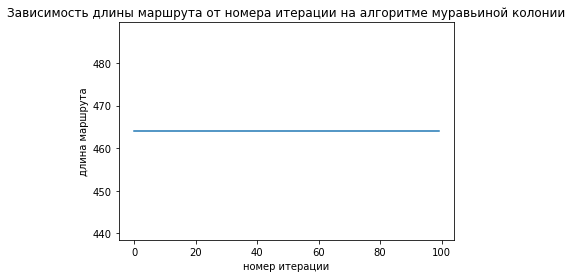

In [18]:
ans=  AS(len(test2), test2, 8, 3, 0.3, 1000, 10, 2000)   #а тут мы поискали классные параметры
print(f'Удачный путь для муравьиного алгоритма {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

In [24]:
test3 = new_matrix(30, 1, 12)

In [25]:
test3 = clear(test3)

Удачный путь для алгоритма отжига 0-12-22-14-21-29-25-28-23-2-13-7-3-26-15-10-18-6-24-17-4-11-8-5-16-27-20-9-1-19-0, его стоимость 114


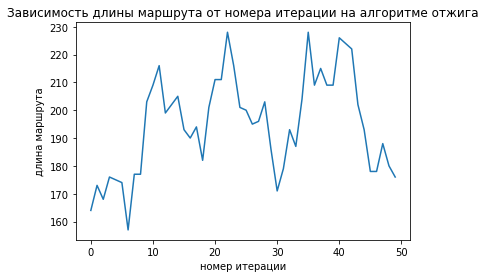

In [28]:
ans = simulated_annealing(len(test3), test3, 0.7, 100, lambda x: 1 / np.log(1 + x) )
print(f'Удачный путь для алгоритма отжига {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

Удачный путь для муравьиного алгоритма 22-24-17-13-5-23-4-28-0-25-19-2-21-29-14-1-3-9-18-10-11-27-15-26-6-16-7-12-20-8-22, его стоимость 43


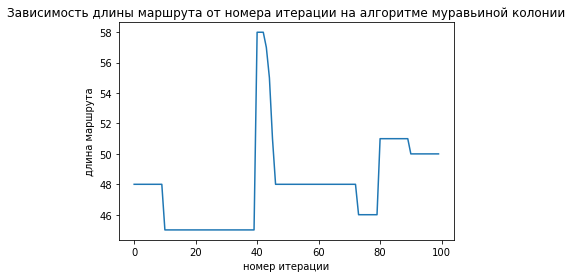

In [29]:
ans = AS(len(test3), test3, 10, 27, 0.2, 15, 40, 500)
print(f'Удачный путь для муравьиного алгоритма {"-".join([str(el) for el in ans[0]])}, его стоимость {ans[1]}')

In [30]:
for el in test3:
    print(*el)

100000000 11 12 10 1 12 6 3 7 1 7 6 7 7 10 8 7 6 4 11 12 10 9 10 8 1 3 9 11 11
8 100000000 8 1 12 4 6 3 8 3 8 10 8 2 2 11 9 11 8 3 2 6 3 8 6 8 6 5 3 9
4 5 100000000 3 3 2 6 4 2 3 11 7 6 7 8 7 12 6 3 3 8 1 2 7 2 12 3 5 6 4
7 12 5 100000000 3 3 6 6 9 1 8 7 6 11 5 7 9 5 9 10 9 4 11 12 1 2 2 8 4 12
2 6 7 1 100000000 2 10 8 6 5 5 1 3 10 10 7 4 3 12 12 4 6 11 8 5 12 9 12 1 4
5 8 9 5 8 100000000 5 12 6 2 11 12 9 12 9 6 2 11 10 9 1 9 4 1 10 8 9 12 2 11
11 8 9 9 11 9 100000000 10 11 9 4 4 7 3 10 5 5 7 10 5 4 9 11 4 5 2 2 5 7 6
6 1 2 4 6 7 10 100000000 7 5 9 12 1 10 3 11 3 2 10 1 2 11 5 12 10 10 12 11 4 10
8 9 11 12 4 6 8 8 100000000 12 6 12 7 11 4 1 8 2 3 12 7 7 1 6 9 2 7 4 10 9
5 10 6 4 6 9 12 8 10 100000000 4 9 9 7 10 7 6 10 3 10 3 10 6 4 10 12 12 9 4 9
1 5 4 10 4 11 2 9 6 3 100000000 1 2 9 7 2 7 7 2 1 9 12 3 9 6 2 6 7 3 9
8 3 2 3 5 12 9 12 4 9 9 100000000 1 3 9 8 11 4 10 8 10 4 1 4 10 4 4 1 11 10
4 7 11 1 9 11 12 3 2 5 7 5 100000000 3 2 6 9 10 3 4 1 4 5 8 12 1 3 10 10 1
1 1 9 11 7 1 12 3 3 1